# In this notebook, we will try to improve the accuracy by taking different approaches

In [127]:
# import required libraries
import numpy as np
import os, sys
import torch
# datasets
import torchvision.datasets as datasets
# transforms
import torchvision.transforms as transforms
# for plots
import matplotlib.pyplot as plt
# neural network modules
import torch.nn as nn
# PyTorch utilities
from torch.utils.data import DataLoader
# optimizers
import torch.optim as optim

import importlib

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src import utilities
from src.utilities import train_model, evaluate, plot_metrics, prediction_and_image
importlib.reload(utilities)

<module 'src.utilities' from '/home/ravi/Desktop/deep-learning-projects/mnist-cnn/src/utilities.py'>

In [21]:
# set device to cuda(gpu)
device = torch.device("cuda")

In [22]:
# define transform
transform = transforms.Compose(
    [
        transforms.ToTensor() # Just transform from the image datatype to PyTorch Tensors
    ]
)
# load the dataset
train_dataset = datasets.MNIST(root='../data', train=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, transform=transform)

### Build a CNN Model

1. Two Convolution Layers
2. Two Max Pooling Layers
3. One Fully Connected Linear Layer
![alt text](../images/cnn_deep.png)

In [23]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=24,kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=24,out_channels=48,kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        self.fc_linear = nn.Linear(in_features=48*5*5, out_features=10)
        self.relu = nn.ReLU()
    
    def forward(self,X):
        X = self.conv1(X)
        X = self.relu(X)
        X = self.pool1(X)

        X = self.conv2(X)
        X = self.relu(X)
        X = self.pool2(X)

        X = self.flatten(X)
        X = self.fc_linear(X)
        return X

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...


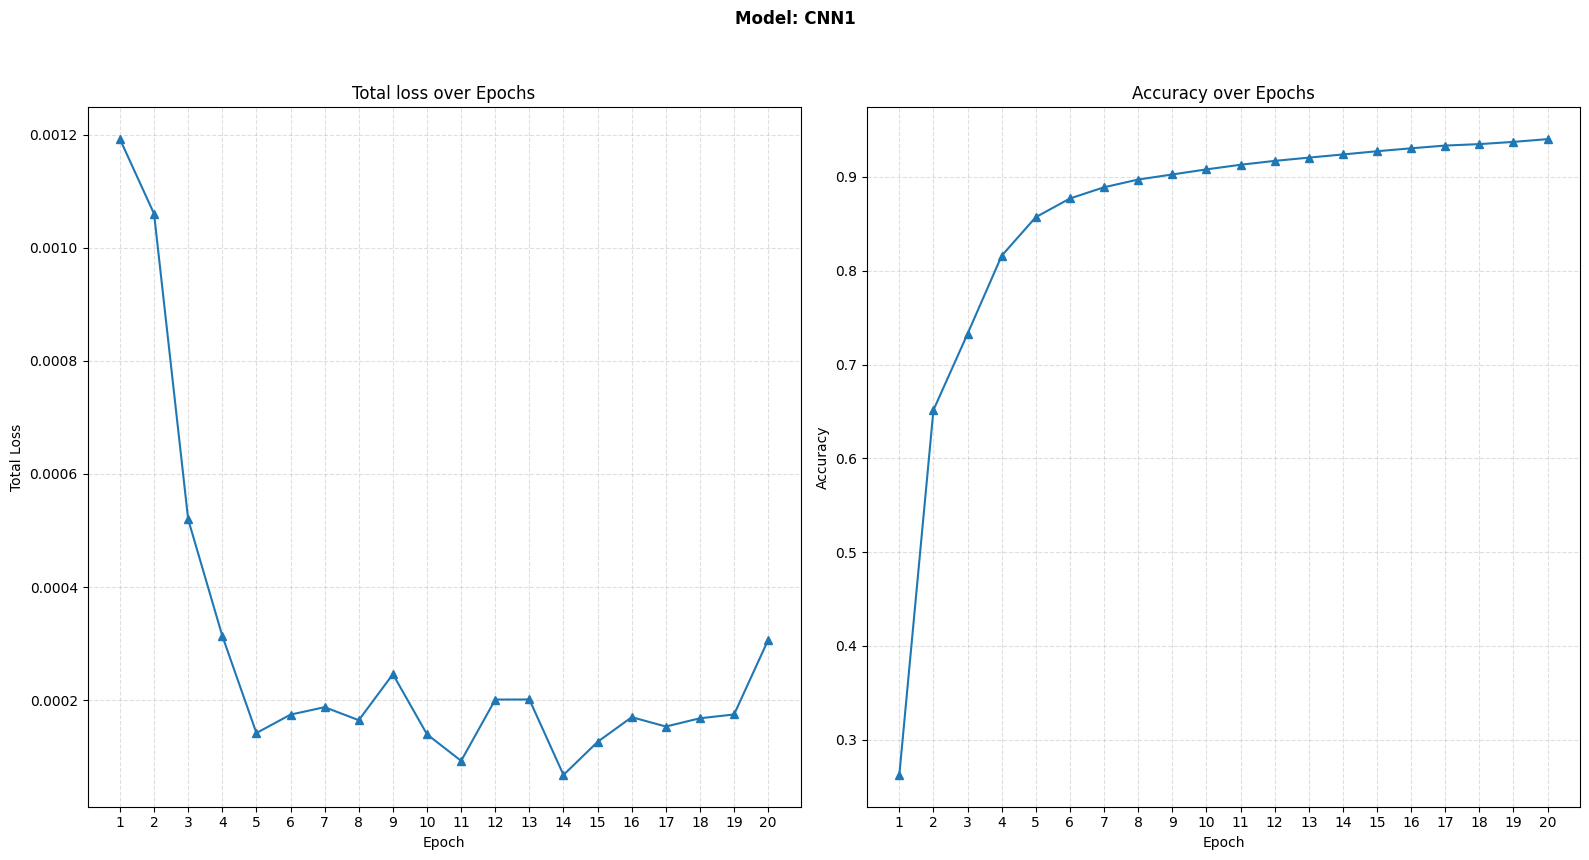

Model: CNN1
Loss(Training): 0.000307
Accuracy(Training): 0.940383
Loss(Testing): 0.185127
Accuracy(Testing): 0.948700


In [71]:
# instantiate the model and move to device
cnn_model_1 = CNN1().to(device)

# define batch size, dataloader, optimizer, and loss functions

# batch size
BATCHSIZE1 = 64
# dataloader
trainset_loader1 = DataLoader(train_dataset, BATCHSIZE1, shuffle=True)
testset_loader1 = DataLoader(test_dataset, BATCHSIZE1, shuffle=False)

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()

# optimizer - starting with the simplest one and with default learning rate
optimizer1 = optim.SGD(cnn_model_1.parameters())

EPOCHS = 20

# train the model
losses1, accuracies1 = train_model(cnn_model_1, trainset_loader1, loss_function, optimizer1, EPOCHS)

plot_metrics(losses1, accuracies1, "CNN1")

# Evaluate the model with test set
test_loss, test_accuracy = evaluate(cnn_model_1, testset_loader1, loss_function)

# print the results
def print_conclusion(model_name, losses, accuracies, test_loss, test_accuracy):
    print(f"Model: {model_name}")
    print(f"Loss(Training): {losses[-1]:.6f}")
    print(f"Accuracy(Training): {accuracies[-1]:.6f}")
    print(f"Loss(Testing): {test_loss:.6f}")
    print(f"Accuracy(Testing): {test_accuracy:.6f}")

print_conclusion("CNN1", losses1, accuracies1, test_loss, test_accuracy)

We see that the accuracy has significantly imporved from the basic_cnn_model. Can we do better ?
Yes, play with the parameters.

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...


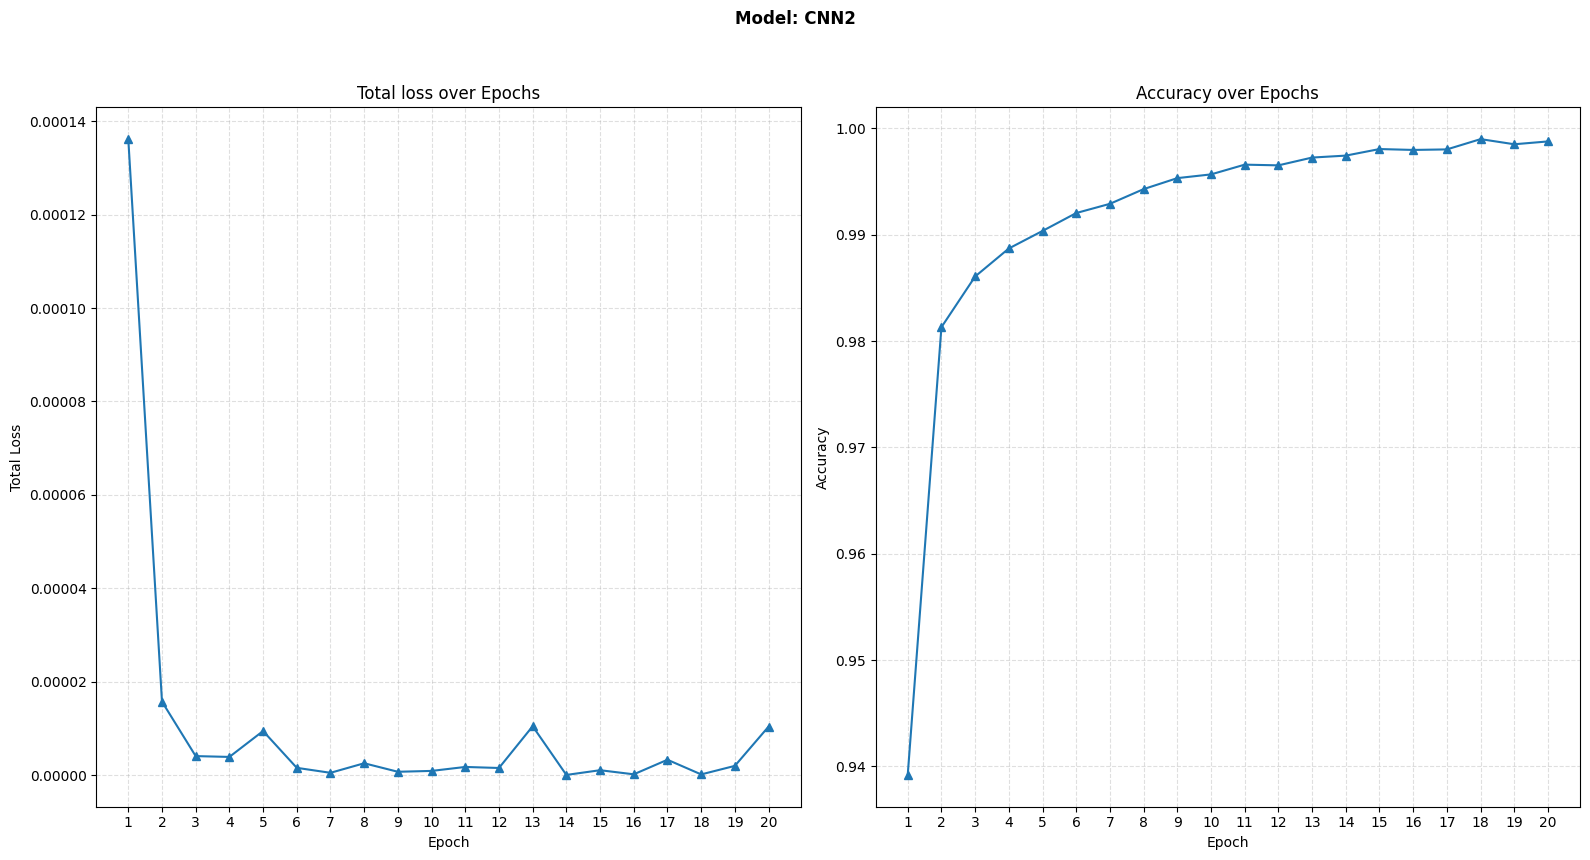

Model: CNN2
Loss(Training): 0.000010
Accuracy(Training): 0.998767
Loss(Testing): 0.041390
Accuracy(Testing): 0.990600


In [72]:
# Checking if accuracy imporves by using different optimization technique
# optimizer - starting with the simplest one and with default learning rate
# instantiate the model and move to device
cnn_model_2 = CNN1().to(device)

# define batch size, dataloader, optimizer, and loss functions
# using same batch size

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()

# optimizer - starting with the simplest one and with default learning rate
optimizer2 = optim.Adam(cnn_model_2.parameters())

EPOCHS = 20

# train this model
losses2, accuracies2 = train_model(cnn_model_2, trainset_loader1, loss_function, optimizer2, EPOCHS)

plot_metrics(losses2, accuracies2, "CNN2")

# Evaluate the model with test set
test_loss2, test_accuracy2 = evaluate(cnn_model_2, testset_loader1, loss_function)

print_conclusion("CNN2", losses2, accuracies2, test_loss2, test_accuracy2)

We see that the accuracy has significantly imporved, a deeper layer and Adam Optimizer boosted our model accuracy.

Checking with different learning rates and other parameters

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...


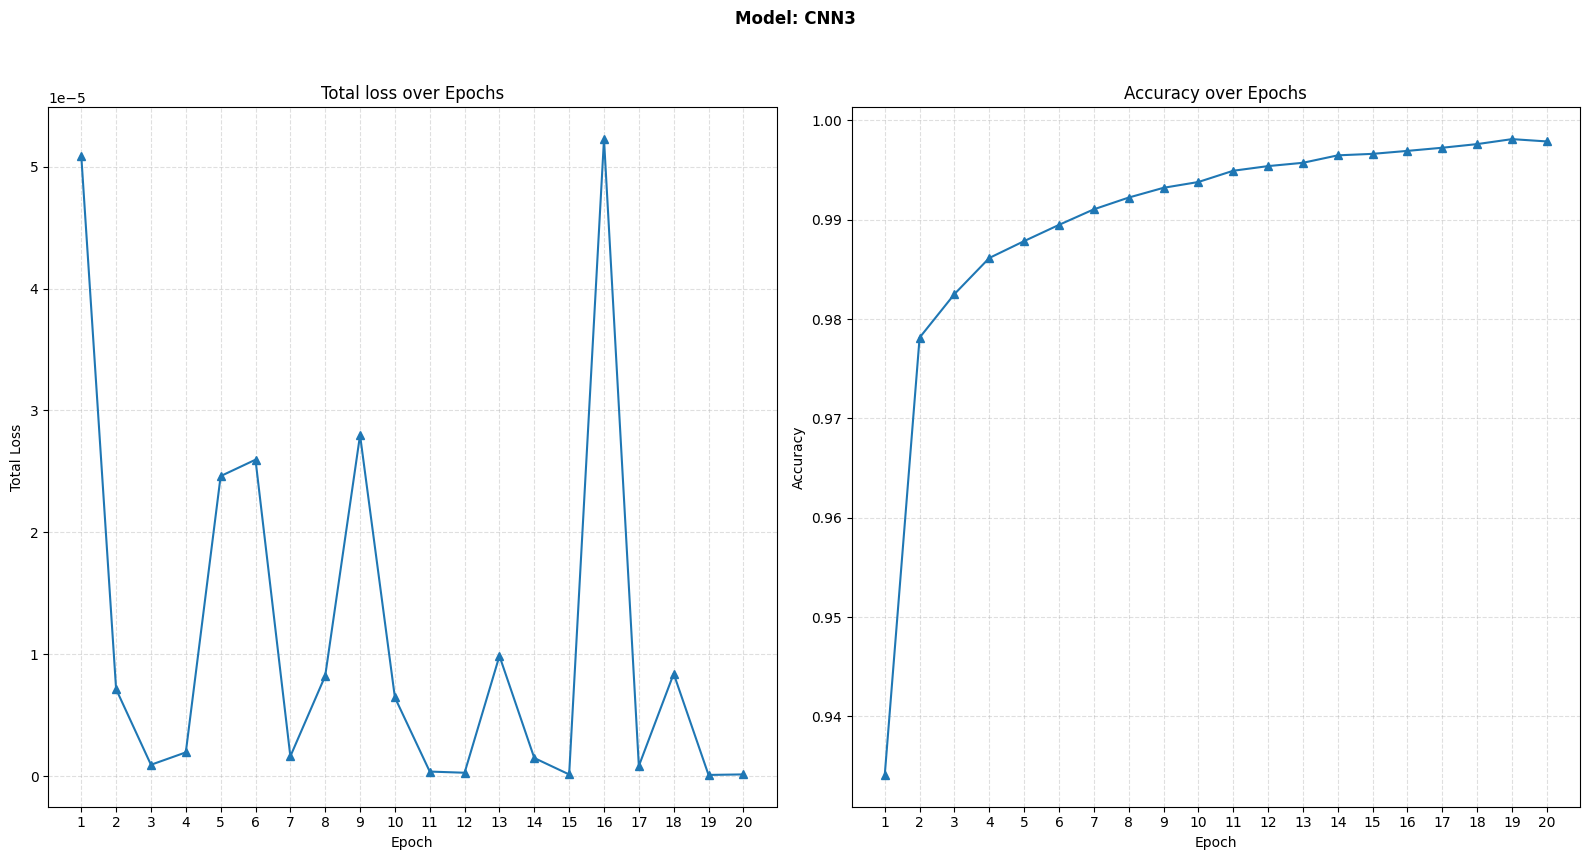

Model: CNN3
Loss(Training): 0.000000
Accuracy(Training): 0.997883
Loss(Testing): 0.039766
Accuracy(Testing): 0.988900


In [74]:
# Checking if accuracy imporves by using different optimization technique
# optimizer - starting with the simplest one and with default learning rate
# instantiate the model and move to device
cnn_model_3 = CNN1().to(device)

# define batch size, dataloader, optimizer, and loss functions

# batch size
BATCHSIZE3 = 32
# dataloader
trainset_loader3 = DataLoader(train_dataset, BATCHSIZE3, shuffle=True)
testset_loader3 = DataLoader(test_dataset, BATCHSIZE3, shuffle=False)

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()

# optimizer 
optimizer3 = optim.Adam(cnn_model_3.parameters(), lr=0.0005)

EPOCHS = 20

# train this model
losses3, accuracies3 = train_model(cnn_model_3, trainset_loader3, loss_function, optimizer3, EPOCHS)

plot_metrics(losses3, accuracies3, "CNN3")

# Evaluate the model with test set
test_loss3, test_accuracy3 = evaluate(cnn_model_3, testset_loader3, loss_function)

print_conclusion("CNN3", losses3, accuracies3, test_loss3, test_accuracy3)

Slower learning rate (0.0005) and a smaller batch size (32) produced almost same results.

In [75]:
# Save all the models
config1 = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "epochs": EPOCHS,
    "optimizer": "SGD",
    "loss_function": "CrossEntropyLoss"
}
state1 = {
    "model_state": cnn_model_1.state_dict(),
    "optimizer_state": optimizer1.state_dict(),
    "config": config1,
    "train_loss": losses1[-1],
    "train_accuracy": accuracies1[-1],
    "test_loss": test_loss,
    "test_accuracy": test_accuracy
}
torch.save(state1, "../checkpoints/cnn_model_1.pt")


config2 = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "epochs": EPOCHS,
    "optimizer": "Adam",
    "loss_function": "CrossEntropyLoss"
}
state2 = {
    "model_state": cnn_model_2.state_dict(),
    "optimizer_state": optimizer2.state_dict(),
    "config": config2,
    "train_loss": losses2[-1],
    "train_accuracy": accuracies2[-1],
    "test_loss": test_loss2,
    "test_accuracy": test_accuracy2
}
torch.save(state2, "../checkpoints/cnn_model_2.pt")

config3 = {
    "learning_rate": 0.0005,
    "batch_size": 32,
    "epochs": EPOCHS,
    "optimizer": "Adam",
    "loss_function": "CrossEntropyLoss"
}
state3 = {
    "model_state": cnn_model_3.state_dict(),
    "optimizer_state": optimizer3.state_dict(),
    "config": config3,
    "train_loss": losses3[-1],
    "train_accuracy": accuracies3[-1],
    "test_loss": test_loss3,
    "test_accuracy": test_accuracy3
}
torch.save(state3, "../checkpoints/cnn_model_3.pt")

### Inference from each model

The image is of the digit (as recognized by our model): 6


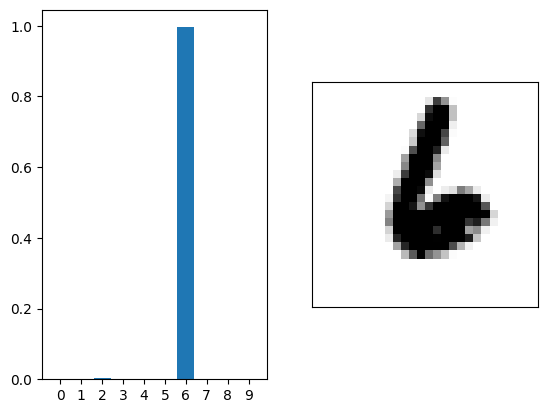

In [128]:
prediction_and_image(cnn_model_1, test_dataset)